# ★ Ordinary Differential Equations ★

In [1]:
# Import modules
import math
import numpy as np
import scipy
from scipy.integrate import ode
from matplotlib import pyplot as plt

# 6.1 Initial Value Problem

## Euler's Method

In [24]:
def euler_method(f, a, b, y0, step=10):
    t = a
    w = y0
    ws = np.zeros(step + 1)
    ws[0] = y0
    h = (b - a) / step
    for i in range(step):
        w += h * f(t, w) 
        t += h
        ws[i + 1] = w
        
    return w, ws

### Example

Apply Euler's Method to initial value problem

$
\begin{cases}
 & y' = ty + t^3\\ 
 & y(0) = 1\\ 
 & t\:in\:[0,1]
\end{cases}
$

In [27]:
f = lambda t, y : t * y + np.power(t, 3)
w = euler_method(f, 0, 1, 1)
print(w[0])

1.77435719915


### Example

Apply Euler's method to the initial value problem

$$
\left\{\begin{matrix}
\begin{align*} 
 & y' = -4t^3y^2 \\
 & y(-10) = 1 / 10001 \\
 & t \:\: in \:\: [-10,0] 
\end{align*}
\end{matrix}\right.
$$

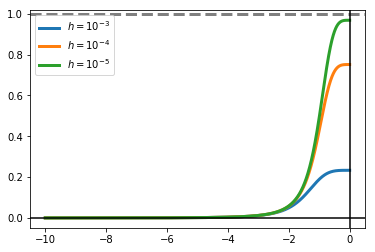

In [65]:
f = lambda t, y : -4 * np.power(t, 3) * np.power(y, 2)
y = lambda t : 1 / (np.power(t, 4) + 1)
_, ws4 = euler_method(f, -10, 0, 1.0 / 10001.0, int(1e4))
_, ws5 = euler_method(f, -10, 0, 1.0 / 10001.0, int(1e5))
w, ws6 = euler_method(f, -10, 0, 1.0 / 10001.0, int(1e6))
x4 = np.linspace(-10, 0 , int(1e4) + 1)
x5 = np.linspace(-10, 0 , int(1e5) + 1)
x6 = np.linspace(-10, 0 , int(1e6) + 1)
plt.plot(x4, ws4, linewidth=3, label='$h = 10^{-3}$')
plt.plot(x5, ws5, linewidth=3, label='$h = 10^{-4}$')
plt.plot(x6, ws6, linewidth=3, label='$h = 10^{-5}$')
plt.axhline(1.0, color='gray', linewidth=3, linestyle='--')
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.legend()
plt.show()

## Explicit Trapezoid Method

In [4]:
def explicit_trapezoid_method(f, a, b, y0, step = 10):
    t = a
    w = y0
    ws = np.zeros(step + 1)
    ws[0] = y0
    h = (b - a) / step
    for i in range(step):
        w += ( h / 2 ) * ( f(t, w) + f(t + h, w + h * f(t, w) ) )
        t += h
        ws[i + 1] = w
        
    return w, ws

### Example

Apply the Explicit Trapezoid Method to the initial value problem with initial condition $y(0) = 1$

$$
\begin{cases}
\begin{align*}
 & y' = ty + t^3\\ 
 & y(0) = 1\\ 
 & t\:\:in\:\:[0,1]
\end{align*}
\end{cases}
$$

In [69]:
f = lambda t, y : t * y + np.power(t, 3)
w, _ = explicit_trapezoid_method(f, 0, 1, 1, step = int(1e1) )
print(w)

1.9471297468


## Taylor Method for order k

## $w_0 = y_0$

## $w_{i+1} = w_i + hf(t_i,w_i) + \frac{h^2}{2}f'(t_i,w_i) + \cdots + \frac{h^k}{k!}f^{(k-1)}(t_i,w_i)$

# 6.3 Systems of ordinary differential equations

### Example

Apply Euler's Method to the first-order system of two equations

$$
\left\{\begin{matrix}\begin{align*}
y_1' &= y_2^2 - 2y_1 \\ 
y_2' &= y_1 - y_2 - ty_2^2 \\ 
y_1(0) &= 0 \\
y_2(0) &= 1 
\end{align*}\end{matrix}\right.
$$


In [3]:
def euler_method_vec(f1, f2, a, b, y0, step=10):
    t = a
    ws1 = np.zeros(step + 1)
    ws2 = np.zeros(step + 1)
    ws1[0] = y0[0]
    ws2[0] = y0[1]
    h = (b - a) / step
    for i in range(step):
        ws1[i + 1] = ws1[i] + h * f1(ws1[i], ws2[i]) 
        ws2[i + 1] = ws2[i] + h * f2(t, ws1[i], ws2[i]) 
        t += h
        
    return ws1, ws2

In [7]:
f1 = lambda y1, y2 : np.power(y2, 2) - 2 * y1
f2 = lambda t, y1, y2 : y1 - y2 - t * np.power(y2, 2)
euler_method_vec(f1, f2, 0, 1, np.array([0, 1]), 10)

(array([ 0.        ,  0.1       ,  0.161     ,  0.19471816,  0.20959529,
         0.21171131,  0.20543819,  0.19390661,  0.17934149,  0.16330497,
         0.14687398]),
 array([ 1.        ,  0.9       ,  0.8119    ,  0.73362637,  0.66358932,
         0.60057588,  0.54365486,  0.49209955,  0.44532892,  0.40286475,
         0.36430177]))

# 6.4 Runge-Kutta Methods And Applications

## Midpoint Method

$$
\begin{align*}
w_0 &= y_0 \\
w_{i+1} &= w_i + hf(t_i + \frac{h}{2},w_i + \frac{h}{2}f(t_i,w_i))
\end{align*}
$$

In [29]:
def midpoint_method(f, a, b, y0, step = 10):
    t = a
    w = y0
    ws = np.zeros(step + 1)
    ws[0] = y0
    h = (b - a) / step
    for i in range(step):
        w += h * f(t + h / 2, w + h / 2 * f(t, w))
        t += h
        ws[i + 1] = w
        
    return ws

## Runge-Kutta Method of order four (RK4)

In [97]:
def runge_kutta_method(f, a, b, y0, step = 10):
    t = a
    h = (b - a) / step
    w_data = np.zeros(step + 1)
    w = w_data[0] = y0
    for i in range(step):
        s1 = f(t, w)
        s2 = f(t + h / 2, w + s1 * h / 2)
        s3 = f(t + h / 2, w + s2 * h / 2)
        s4 = f(t + h, w + h * s3)
        t += h
        w += h / 6 * (s1 + 2 * s2 + 2 * s3 + s4)
        w_data[i + 1] = w
        
    return w_data

### Example

Apply Runge-Kutta of order four to the initial value problem

$$
\left\{\begin{matrix}\begin{align*}
 & y' = ty + t^3 \\
 & y(0) = 1
\end{align*}\end{matrix}\right.
$$

In [100]:
f = lambda t, y : t * y + np.power(t, 3)
ans = lambda t : - pow(t, 2) - 2 + 3 * math.exp(pow(t, 2) / 2)
w_data = runge_kutta_method(f, 0, 1, 1, step = 10)
print(' answer:%.15f' %ans(1) )
print('predict:%.15f' %w_data[-1] )

 answer:1.946163812100385
predict:1.946162346634853


# 6.5 Variable Step-Size Methods

## Runge-Kutta order 2 / order 3 embedded  pair

$$
\begin{align*}
w_{i+1} &= w_i + h\frac{s_1 + s_2}{2} \\ 
z_{i+1} &= w_i + h\frac{s_1 + 4s_3 + s2}{6} \\
\end{align*}
$$

where

$$
\begin{align*}
s_1 &= f(t_i, w_i) \\
s_2 &= f(t_i + h, w_i + hs_1) \\
s_3 &= f(t_i + \frac{1}{2}h, w_i + \frac{1}{2}h\frac{s_1 + s_2}{2}) \\
e_{i+1} &\approx |w_{i+1} - z_{i+1}| = |h\frac{s_1 - 2s_3 + s_2}{3}|
\end{align*}
$$


## Bogacki-Shampine order 2 / order 3 embedded pair

$$
\begin{align*}
s_1 &= f(t_i, w_i) \\
s_2 &= f(t_i + \frac{1}{2}h, w_i + \frac{1}{2}hs_1) \\
s_3 &= f(t_i + \frac{3}{4}h, w_i + \frac{3}{4}hs_2) \\
z_{i+1} &= w_i + \frac{h}{9}(2s_1 + 3s_2 + 4s_3) \\
s_4 &= f(t + h,z_{i+1}) \\
w_{i+1} &= w_{i} + \frac{h}{24}(7s_1 + 6s_2 + 8s_3 + 3s_4) \\
e_{i+1} &= |z_{i+1} - w_{i+1}| = \frac{h}{72}|-5s_1 + 6s_2 + 8s_3 - 9s_4|
\end{align*}
$$



## Runge-Kutta-Fehlberg order 4 / order 5 embedded pair

$$
\begin{align*}
s_1 &= f(t_i, w_i) \\
s_2 &= f(t_i + \frac{1}{4}h, w_i + \frac{1}{4}hs_1) \\
s_3 &= f(t_i + \frac{3}{8}h, w_i + \frac{3}{32}hs_1 + \frac{9}{32}hs_2) \\
s_4 &= f(t_i + \frac{12}{13}h, w_i + \frac{1932}{2197}hs_1 - \frac{7200}{2197}hs_2 + \frac{7296}{2197}hs_3) \\
s_5 &= f(t_i + h, w_i + \frac{439}{216}hs_1 - 8hs_2 + \frac{3680}{513}hs_3 - \frac{845}{4104}hs_4) \\
s_6 &= f(t_i + \frac{1}{2}h, w_i - \frac{8}{27}hs_1 + 2hs_2 - \frac{3544}{2565}hs_3 + \frac{1859}{4104}hs_4 -\frac{11}{40}hs_5) \\
w_{i+1} &= w_i + h(\frac{25}{216}s_1 + \frac{1408}{4275}s_3 + \frac{2197}{4104}s_4 - \frac{1}{5}s_5) \\
z_{i+1} &= w_i + h(\frac{16}{135}s_1 + \frac{6656}{12825}s_3 + \frac{28561}{56430}s_4 - \frac{9}{50}s_5 + \frac{2}{55}s_6) \\
e_{i + 1} &= |z_{i+1} - w_{i+1}| = h|\frac{1}{360}s_1 - \frac{128}{4275}s_3 - \frac{2197}{75240}s_4 + \frac{1}{50}s_5 + \frac{2}{55}s_6| 
\end{align*}
$$

In [2]:
def ode_rkf45(f, t0, b, y0, h = 1e-3, tol = 1e-6):
    w = y0
    t = t0
    while(t < b):
        w_this, t_this = w, t
        s1 = f(t, w)
        hs1 = h * s1
        s2 = f(t + h / 4, w + hs1 / 4)
        hs2 = h * s2
        s3 = f(t + 3 / 8 * h, w + 3 / 32 * hs1 + 9 / 32 * hs2)
        hs3 = h * s3
        s4 = f(t + 12 / 13 * h, w + 1932 / 2197 * hs1 - 7200 / 2197 * hs2 + 7296 / 2197 * hs3)
        hs4 = h * s4
        s5 = f(t + h, w + 439 / 216 * hs1 - 8 * hs2 + 3680 / 513 * hs3 - 845 / 4104 * hs4)
        hs5 = s5 * h
        s6 = f(t + h / 2, w - 8 / 27 * hs1 + 2 * hs2 - 3544 / 2565  * hs3 + 1859 / 4104 * hs4 - 11 / 40 * hs5)
        z = w + h * (16 / 135 * s1 + 6656 / 12825 * s3 + 28561 / 56430 * s4 - 9 / 50 * s5 + 2 / 55 * s6)
        w += h * (25 / 216 * s1 + 1408 / 2565 * s3 + 2197 / 4104 * s4 - s5 / 5)
        t += h
        e = abs(z - w)
        if e / abs(w) < tol:
            w = z
        else:
            h = 0.8 * pow(tol * abs(w) / e, 1 / 5) * h
        
    return w

## Dormand-Prince order 4 / order 5 embedded pair

$$
\begin{align*}
s_1 &= f(t_i, w_i) \\
s_2 &= f(t_i + \frac{1}{5}h, w_i + \frac{1}{5}hs_i) \\
s_3 &= f(t_i + \frac{3}{10}h, w_i + \frac{3}{40}hs_i + \frac{9}{40}hs_2) \\
s_4 &= f(t_i + \frac{4}{5}h, w_i + \frac{44}{45}hs_i - \frac{56}{15}hs_2 + \frac{32}{9}hs_3) \\
s_5 &= f(t_i + \frac{8}{9}h, w_i + h(\frac{19372}{6561}s_1 - \frac{25360}{2187}s_2 + \frac{64448}{6561}s_3 - \frac{212}{729}s_4)) \\
s_6 &= f(t_i + h, w_i + h(\frac{9017}{3168}s_1 - \frac{355}{33}s_2 + \frac{46732}{5247}s_3 + \frac{49}{176}s_4 - \frac{5103}{18656}s_5)) \\
z_{i+1} &= w_i +h(\frac{35}{384}s_1 + \frac{500}{1113}s_3 + \frac{125}{192}s_4 - \frac{2187}{6784}s_5 + \frac{11}{84}s_6) \\
s_7 &= f(t_i + h, z_{i+1}) \\
w_{i+1} &= w_i + h(\frac{5179}{57600}s_1 + \frac{7571}{16695}s_3 + \frac{393}{640}s_4 - \frac{92097}{339200}s_5 + \frac{187}{2100}s_6 + \frac{1}{40}s_7) \\
e_{i+1} &= |z_{i+1} - w_{i+1}| = h|\frac{71}{57600}s_1 - \frac{71}{16695}s_3 + \frac{71}{1920}s_4 - \frac{17253}{339200}s_5 + \frac{22}{525}s_6 - \frac{1}{40}s_7|
\end{align*}
$$

### Example

Use ode45 to solve the initial value problem within a relative tolerance of $10^{-4}$

$
\left\{\begin{matrix}\begin{align*}
 & y' = ty + t^3 \\
 & y(0) = 1 \\
 & t\:in\:[0,1]
\end{align*}\end{matrix}\right.
$

In [89]:
f = lambda t, y : t * y + np.power(t, 3)
ans = lambda t : - pow(t, 2) - 2 + 3 * math.exp(pow(t, 2) / 2)
print('%.15f' %ans(1) )
print('%.15f' %ode_rkf45(f, 0, 1, 1, tol=1e-13) )

1.946163812100385
1.946163812100387


In [27]:
f = lambda t, y : t * y + np.power(t, 3)
r = ode(f).set_integrator('dopri5')
r.set_initial_value(1, 0)
terminate = 0.9
dt = 0.1
while r.successful() and r.t <= terminate:
    print(r.t + dt, r.integrate(r.t + dt))

0.1 [ 1.00503756]
0.2 [ 1.02060402]
0.30000000000000004 [ 1.04808358]
0.4 [ 1.0898612]
0.5 [ 1.14944536]
0.6 [ 1.23165209]
0.7 [ 1.34286394]
0.7999999999999999 [ 1.49138329]
0.8999999999999999 [ 1.6879075]
0.9999999999999999 [ 1.94616381]


# 6.6 Implicit Methods And Stiff Equations

## Backward Euler Method

$$
\begin{align*}
w_0 &= y_0 \\
w_{i+1} &= w_{i} + hf(t_{i+1}, w_{i+1})
\end{align*}
$$

### Example

Apply the Backward Euler Method to the initial value problem

$$
\left\{\begin{matrix}\begin{align*}
 & y' = y + 8y^2 - 9y^3 \\
 & y(0) = 1 / 2 \\
 & t\:in\:[0,3]
\end{align*}\end{matrix}\right.
$$

$$
\begin{align*}
 & w_{i+1} = w_i + h(t_{i+1}, w_{i+1}) = w_i + h(w_{i+1} + 8w_{i+1}^2 - 9w_{i+1}^3) \\ 
 & Let\:z = w_i + h(z + 8z^2 -9z^3) \\
 & \Rightarrow 9hz^3 - 8hz^2 + (1 - h)z - w_i = 0
\end{align*}
$$

In [3]:
step = 20
f = lambda z, h, d : 9 * h * np.power(z, 3) - 8 * h * np.power(z, 2) + (1 - h) * z - d
x0 = 0.5
h = 0.15
y0 =0.5
for _ in range(step):
    z = scipy.optimize.newton(f, x0, args=(h, y0))
    x0 = y0 = z
    
print(z)

0.999999990282


# 6.7 Multistep Methods

## Adams-Bashforth Two-Step Method

$w_{i + 1} = w_i + h [\frac{3}{2}f(t_i, w_i) - \frac{1}{2}f(t_{i - 1}, w_{i - 1})]$

In [37]:
def adams_bashforth(f, a, b, y0, step = 10):
    h = (b - a) / step
    w = y0
    w_n = explicit_trapezoid_method(f, a, b, y0)[0]
    t = a
    t_n = a + h
    for _ in range(step - 1):
        tmp_w_n = w_n
        w_n += h * (1.5 * f(t_n, w_n) - 0.5 * f(t, w))
        w = tmp_w_n
        t_n += h
        t += h
        
    return w_n

### Example

Apply strongly stable method, weakly stable method, and unstable method to the initial value problem

$$
\left\{\begin{matrix}\begin{align*}
 & y' = -3y \\
 & y(0) = 1 \\
 &t\:in\:[0,2]
\end{align*}\end{matrix}\right.
$$

In [38]:
f = lambda t, w : -3 * w
w = adams_bashforth(f, 0, 2, 1, step = 20)
print(w)

0.0006820043181444647
